In [24]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import pickle
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                    validation_split=0.3) #splitting the validation or test set to 30% of the content of the directory

training_set = train_datagen.flow_from_directory('C:\\Users\\asus\\OneDrive\\Desktop\\Studies\\Deep Learning\\Week 6\\Group Project\\datasets',
                                                 target_size = (64 , 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                subset='training') #Assigning the variable as a training data

Found 3956 images belonging to 2 classes.


In [26]:
test_set = train_datagen.flow_from_directory('C:\\Users\\asus\\OneDrive\\Desktop\\Studies\\Deep Learning\\Week 6\\Group Project\\datasets',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                           subset='validation') #Assigning the variable as a test data

Found 1694 images belonging to 2 classes.


In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
124/124 [==============================] - 146s 1s/step - loss: 0.0891 - accuracy: 0.9548 - val_loss: 0.0714 - val_accuracy: 0.9894
Epoch 2/25
124/124 [==============================] - 144s 1s/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.1289 - val_accuracy: 0.9906
Epoch 3/25
124/124 [==============================] - 142s 1s/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.1254 - val_accuracy: 0.9906
Epoch 4/25
124/124 [==============================] - 153s 1s/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.1958 - val_accuracy: 0.9906
Epoch 5/25
124/124 [==============================] - 147s 1s/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1175 - val_accuracy: 0.9906
Epoch 6/25
124/124 [==============================] - 137s 1s/step - loss: 3.1389e-04 - accuracy: 1.0000 - val_loss: 0.2554 - val_accuracy: 0.9906
Epoch 7/25
124/124 [==============================] - 175s 1s/step - loss: 9.1724e-05 - accuracy: 1.0000 - val_loss: 0.2086 - val_accuracy

In [28]:
model.save('C:\\Users\\asus\\OneDrive\\Desktop\\Studies\\Deep Learning\\Week 6\\Group Project\\models\\Student_Engagement_Model.h5')

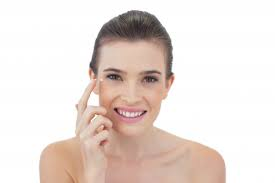

In [32]:
import numpy as np #Converts the image into an array
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\asus\\OneDrive\\Desktop\\Studies\\Deep Learning\\Week 6\\Group Project\\images.jpeg', target_size = (64, 64))
#Turn the size to similar target size

test_image = image.img_to_array(test_image)

#Converts the prediction image into an array
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image/255.0)
training_set.class_indices
print(result[0][0]) #0,0 shows the first value

if result[0][0] > 0.5:
  prediction = 'Not Engaged'
else:
  prediction = 'Engaged'
print(prediction)

0.09040921
Engaged


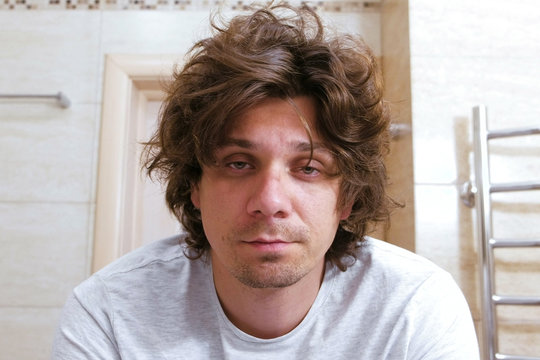

In [33]:
import numpy as np #Converts the image into an array
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\asus\\OneDrive\\Desktop\\Studies\\Deep Learning\\Week 6\\Group Project\\360_F_236328350_dMsii4C0iO8m03xTh7o1oDhyLUqEucVO.jpg', target_size = (64, 64))
#Turn the size to similar target size

test_image = image.img_to_array(test_image)

#Converts the prediction image into an array
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image/255.0)
training_set.class_indices
print(result[0][0]) #0,0 shows the first value

if result[0][0] > 0.5:
  prediction = 'Not Engaged'
else:
  prediction = 'Engaged'
print(prediction)

0.99999964
Not Engaged
